<a href="https://colab.research.google.com/github/hafsamustafa526-tech/heart-disease-prediciton/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries and models

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## Loading the data set

In [ ]:
df=pd.read_csv('heart.csv')

## Data Preprocessing,EDA

In [ ]:
df.head(7)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
135,49,M,NAP,115,265,0,Normal,175,N,0.0,Flat,1
538,54,M,ASY,130,202,1,Normal,112,Y,2.0,Flat,1
126,34,F,ATA,130,161,0,Normal,190,N,0.0,Up,0
244,48,M,ASY,160,268,0,Normal,103,Y,1.0,Flat,1
332,38,M,NAP,100,0,0,Normal,179,N,-1.1,Up,0


In [ ]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
list(range(df['ChestPainType'].nunique()))

[0, 1, 2, 3]

In [ ]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
cat_cols=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

In [ ]:
for col in cat_cols:
    print(col)
    print((df[col].unique()),list(range(df[col].nunique())))
    df[col].replace((df[col].unique()),range(df[col].nunique()),inplace=True)
    print('-'*90)


Sex
['M' 'F'] [0, 1]
------------------------------------------------------------------------------------------
ChestPainType
['ATA' 'NAP' 'ASY' 'TA'] [0, 1, 2, 3]
------------------------------------------------------------------------------------------
RestingECG
['Normal' 'ST' 'LVH'] [0, 1, 2]
------------------------------------------------------------------------------------------
ExerciseAngina
['N' 'Y'] [0, 1]
------------------------------------------------------------------------------------------
ST_Slope
['Up' 'Flat' 'Down'] [0, 1, 2]
------------------------------------------------------------------------------------------


/tmp/ipython-input-550591089.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace((df[col].unique()),range(df[col].nunique()),inplace=True)
/tmp/ipython-input-550591089.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].replace((df[col].unique()),range(df[col].nunique()),inpl

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1,1
914,68,0,2,144,193,1,0,141,0,3.4,1,1
915,57,0,2,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [ ]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
0,172
254,11
220,10
223,10
204,9
...,...
353,1
278,1
157,1


In [ ]:
df['Cholesterol'].replace(0,np.nan,inplace=True)

/tmp/ipython-input-70607578.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cholesterol'].replace(0,np.nan,inplace=True)


In [ ]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3)
after_impute=imputer.fit_transform(df)   #gives numpy array
df=pd.DataFrame(after_impute,columns=df.columns) #converting back to dataframe

In [ ]:
df['Cholesterol'].isna().sum()

np.int64(0)

In [ ]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
254.0,11
223.0,10
216.0,10
230.0,10
220.0,10
...,...
353.0,1
278.0,1
157.0,1


In [ ]:
df['RestingBP'][df['RestingBP']==0]

,RestingBP
449,0.0


In [ ]:
df['RestingBP'].replace(0,np.nan,inplace=True)
imputer=KNNImputer(n_neighbors=3)
after_impute=imputer.fit_transform(df)
df=pd.DataFrame(after_impute,columns=df.columns)

/tmp/ipython-input-3635857050.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RestingBP'].replace(0,np.nan,inplace=True)


In [ ]:
df['RestingBP'].unique()

array([140., 160., 130., 138., 150., 120., 110., 136., 115., 100., 124.,
       113., 125., 145., 112., 132., 118., 170., 142., 190., 135., 180.,
       108., 155., 128., 106.,  92., 200., 122.,  98., 105., 133.,  95.,
        80., 137., 185., 165., 126., 152., 116., 144., 154., 134., 104.,
       139., 131., 141., 178., 146., 158., 123., 102.,  96., 143., 172.,
       156., 114., 127., 101., 174.,  94., 148., 117., 192., 129., 164.])

In [ ]:
df['RestingBP'].isna().sum()

np.int64(0)

In [ ]:
columns=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']
df[columns]=df[columns].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             918 non-null    int64
 1   Sex             918 non-null    int64
 2   ChestPainType   918 non-null    int64
 3   RestingBP       918 non-null    int64
 4   Cholesterol     918 non-null    int64
 5   FastingBS       918 non-null    int64
 6   RestingECG      918 non-null    int64
 7   MaxHR           918 non-null    int64
 8   ExerciseAngina  918 non-null    int64
 9   Oldpeak         918 non-null    int64
 10  ST_Slope        918 non-null    int64
 11  HeartDisease    918 non-null    int64
dtypes: int64(12)
memory usage: 86.2 KB


# Data Visualization

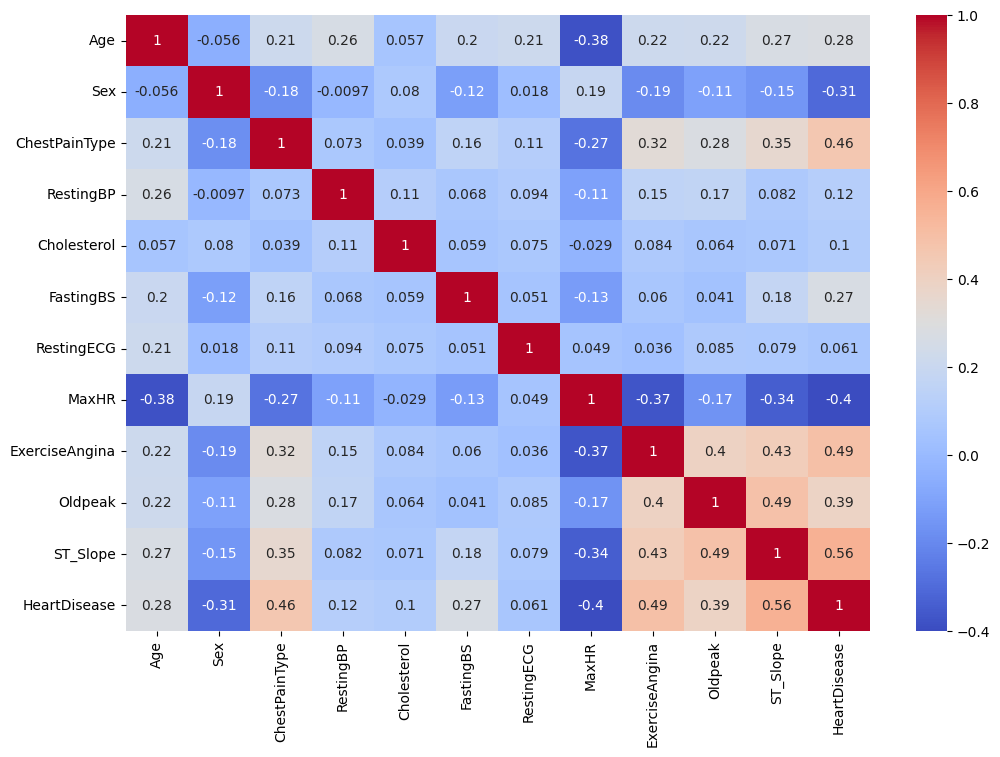

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
figure=px.line(df.corr()['HeartDisease'][:-1].sort_values())
figure.show()

# Age and HeartDisease Distribution

In [ ]:
px.sunburst(df,path=['HeartDisease','Age'])

In [ ]:
px.histogram(df,x='Age',color='HeartDisease')

## **Percentage** **of** **Heartdisease** **data** **Distribution**

In [ ]:
px.pie(df,names='HeartDisease',title='PercentageofHeartdisease classes Distribution')

## Sex vs heartdisease

In [ ]:
px.histogram(df,x='Sex',color='HeartDisease')

## ChestPainType vs HeartDisease

In [ ]:
px.histogram(df,x='ChestPainType',color='HeartDisease')
##['ATA' 'NAP' 'ASY' 'TA'] [0, 1, 2, 3]

## MaxHR vs HeartDisease

In [ ]:
px.violin(df,x='HeartDisease',y='MaxHR',color='HeartDisease')

In [ ]:
px.sunburst(df,path=['HeartDisease','MaxHR'])

In [ ]:
x=df.drop(['HeartDisease'],axis=1)
y=df['HeartDisease']

## **Train Test Splitting**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve

In [ ]:
solver=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
best_solver=''
test_score=np.zeros(6)
for i,n in enumerate(solver):
  model=LogisticRegression(solver=n).fit(x_train,y_train)
  test_score[i]=model.score(x_test,y_test)
  if test_score[i]==test_score.max():
     best_solver=n



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [ ]:
model=LogisticRegression(solver=best_solver)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(f'LogisticRegression Score({best_solver}):{accuracy_score(y_test,y_pred)}')
print(f'LR:{confusion_matrix(y_test,y_pred)}')

LogisticRegression Score(newton-cholesky):0.8586956521739131
LR:[[67 15]
 [11 91]]


In [ ]:
y_prob=model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
fpr,tpr,thresholds

(array([0.        , 0.        , 0.        , 0.01219512, 0.01219512,
        0.02439024, 0.02439024, 0.03658537, 0.03658537, 0.04878049,
        0.04878049, 0.06097561, 0.06097561, 0.07317073, 0.07317073,
        0.08536585, 0.08536585, 0.09756098, 0.09756098, 0.1097561 ,
        0.1097561 , 0.13414634, 0.13414634, 0.14634146, 0.14634146,
        0.15853659, 0.15853659, 0.18292683, 0.18292683, 0.20731707,
        0.20731707, 0.2195122 , 0.2195122 , 0.26829268, 0.26829268,
        0.37804878, 0.37804878, 0.46341463, 0.46341463, 0.51219512,
        0.51219512, 0.86585366, 0.86585366, 1.        ]),
 array([0.        , 0.00980392, 0.05882353, 0.05882353, 0.19607843,
        0.19607843, 0.24509804, 0.24509804, 0.48039216, 0.48039216,
        0.52941176, 0.52941176, 0.53921569, 0.53921569, 0.59803922,
        0.59803922, 0.6372549 , 0.6372549 , 0.75490196, 0.75490196,
        0.76470588, 0.76470588, 0.7745098 , 0.7745098 , 0.79411765,
        0.79411765, 0.88235294, 0.88235294, 0.89215686, 0.

# **SVC**

In [ ]:
from sklearn.metrics import f1_score
from sklearn.svm import SVC
kernels={'linear':0,'poly':0,'rbf':0,'sigmoid':0}
best=''
for i in kernels:
  svm=SVC(kernel=i)
  svm.fit(x_train,y_train)
  yhat=svm.predict(x_test)
  kernels[i]=f1_score(y_test,yhat,average='weighted')
  if kernels[i]==max(kernels.values()):
    best=i

In [ ]:
svm=SVC(kernel=best)
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
print(f'SVC Score({best}):{f1_score(y_test,y_pred,average='weighted')}')


SVC Score(linear):0.8476254501300231


### **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model=DecisionTreeClassifier(class_weight='balanced')
param_grid={
    'max_depth':[3,4,5,6,7,8],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3,4],
    'random_state':[0,42]
}
gs=GridSearchCV(model,param_grid,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]})

In [ ]:
Ctree=DecisionTreeClassifier(**gs.best_params_,class_weight='balanced')
Ctree.fit(x_train,y_train)
y_pred=Ctree.predict(x_test)
print('DecisionTrees Accuracy:',accuracy_score(y_test,y_pred))

DecisionTrees Accuracy: 0.8097826086956522


## **Random forest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

param_grid={
    'n_estimators':[50,100,150,500],
    'max_features':['sqrt','log2',None],
    'max_depth':[3,6,9,19],
    'max_leaf_nodes':[3,6,9]
}
gs=GridSearchCV(rfc,param_grid)
gs.fit(x_train,y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9, 19],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [50, 100, 150, 500]})

In [ ]:
model=RandomForestClassifier(**gs.best_params_)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('Random Forest Accuracy:',accuracy_score(y_test,y_pred))

Random Forest Accuracy: 0.8478260869565217


## Feature importance analysis for logistic regression

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),('model',LogisticRegression(max_iter=1000))])
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

In [ ]:
coeff=pipe.named_steps['model'].coef_[0]
importance=pd.Series(abs(coeff),index=x_train.columns).sort_values(ascending=False)
print(importance)

ST_Slope          1.048686
ChestPainType     0.589029
ExerciseAngina    0.582778
Sex               0.497130
FastingBS         0.456523
MaxHR             0.400602
Oldpeak           0.162080
Cholesterol       0.121985
RestingECG        0.056705
RestingBP         0.026710
Age               0.008237
dtype: float64
